# Logistic Regression

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading Dataset

In [2]:
dataset=pd.read_csv('UserData.csv')

#### Dependent and Independent Variables

In [3]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

#### Splitting the Dataset

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#### Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
x_train=SS.fit_transform(x_train)
x_test=SS.transform(x_test)

#### Training Model

In [6]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)
ypred=classifier.predict(x_test)

C:\Users\SAI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Performance of Model

In [7]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypred)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[67  5]
 [ 9 20]]


In [8]:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,ypred))

Accuracy: 0.8613861386138614


#### Visualization the Performance of Model

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


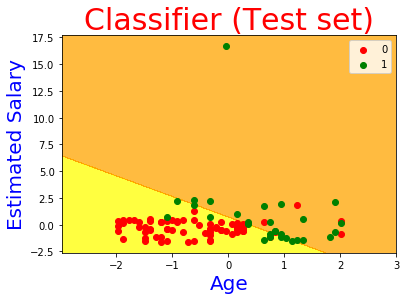

In [9]:
from matplotlib.colors import ListedColormap 
X_set, Y_set = x_test,y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1,stop=X_set[:, 0].max()+1,step=0.01), 
                    np.arange(start=X_set[:, 1].min()-1,stop=X_set[:, 1].max()+1,step=0.01)) 

plt.contourf(X1, X2, classifier.predict( 
                np.array([X1.ravel(), X2.ravel()]).T).reshape( 
                X1.shape), alpha = 0.75, cmap = ListedColormap(('yellow', 'orange'))) 

plt.xlim(X1.min(), X1.max()) 
plt.ylim(X2.min(), X2.max()) 

for i, j in enumerate(np.unique(Y_set)): 
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], 
    c = ListedColormap(('red', 'green'))(i), label = j) 

plt.title('Classifier (Test set)',loc='center',size=30,color='red') 
plt.xlabel('Age',size=20,color='blue') 
plt.ylabel('Estimated Salary',size=20,color='blue') 
plt.legend() 
plt.show() 
